In [1]:
import xarray as xr
import sys
sys.path.insert(0,"/home/albert/lib/python")

import numpy as np
sys.path.insert(0,"/home/albert/Work/git/xscale")
import xscale
import xscale.spectral.fft as xfft

sys.path.insert(0,"/home/albert/lib/python/w_k_scripts")
import Wavenum_freq_spec_func as wfs

In [2]:
## Dataset

dirtide="/mnt/albert/equipes/IGE/meom/MODEL_SET/eNATL60/eNATL60-BLBT02-S/1h/ACO/"
dirnotide="/mnt/albert/equipes/IGE/meom/MODEL_SET/eNATL60/eNATL60-BLB002-S/1h/ACO/"



In [3]:
filesUtide="eNATL60ACO-BLBT02_1h_*_gridU-2D_*.nc"
filesVtide="eNATL60ACO-BLBT02_1h_*_gridV-2D_*.nc"

tfilesUtide=dirtide+filesUtide
tfilesVtide=dirtide+filesVtide

filesUnotide="eNATL60ACO-BLB002_1h_*_gridU-2D_*.nc"
filesVnotide="eNATL60ACO-BLB002_1h_*_gridV-2D_*.nc"

tfilesUnotide=dirnotide+filesUnotide
tfilesVnotide=dirnotide+filesVnotide


In [4]:
fUtide = xr.open_mfdataset(tfilesUtide)
Utide=fUtide['sozocrtx'][:]
navlat= fUtide['nav_lat']
navlon= fUtide['nav_lon']

fUnotide = xr.open_mfdataset(tfilesUnotide)
Unotide=fUnotide['sozocrtx'][:]

fVtide = xr.open_mfdataset(tfilesVtide)
Vtide=fVtide['somecrty'][:]

fVnotide = xr.open_mfdataset(tfilesVnotide)
Vnotide=fVnotide['somecrty'][:]


In [5]:
Utide

<xarray.DataArray 'sozocrtx' (time_counter: 744, y: 1191, x: 781)>
dask.array<shape=(744, 1191, 781), dtype=float32, chunksize=(24, 1191, 781)>
Coordinates:
    nav_lat        (y, x) float32 23.174568 23.174568 23.174568 23.17457 ...
    nav_lon        (y, x) float32 -37.391693 -37.375027 -37.35836 -37.341694 ...
    time_centered  (time_counter) datetime64[ns] dask.array<shape=(744,), chunksize=(24,)>
  * time_counter   (time_counter) datetime64[ns] 2009-07-10T00:30:00 ...
Dimensions without coordinates: y, x
Attributes:
    long_name:           ocean surface current along i-axis
    units:               m/s
    online_operation:    average
    interval_operation:  40 s
    interval_write:      1 h
    cell_methods:        time: mean (interval: 40 s)

In [6]:
wutide=Utide.window

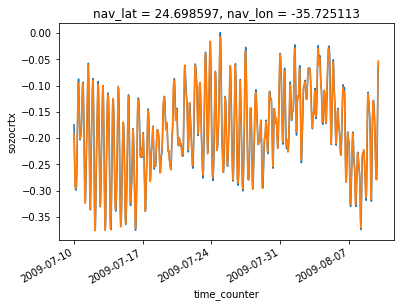

In [24]:
wutide.set(n=30,dim='time_counter', cutoff=10000)
Utidefilt=wutide.convolve()
Utide.isel(y=100, x=100).plot()
Utidefilt.isel(y=100, x=100).plot(label='filt')

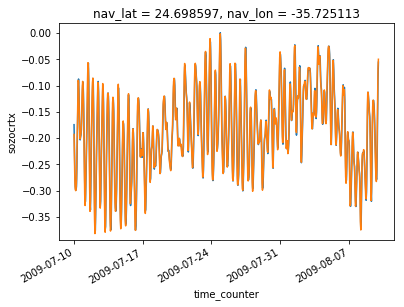

In [25]:
wutide.set(n=40,dim='time_counter', cutoff=10000)
Utidefilt=wutide.convolve()
Utide.isel(y=100, x=100).plot()
Utidefilt.isel(y=100, x=100).plot(label='filt')

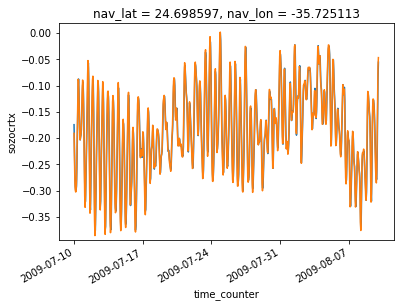

In [26]:
wutide.set(n=10,dim='time_counter', cutoff=10000)
Utidefilt=wutide.convolve()
Utide.isel(y=100, x=100).plot()
Utidefilt.isel(y=100, x=100).plot(label='filt')